IMPORTING LIBRARIES

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

LOADING DATASET

In [33]:
dataset = pd.read_csv('Facebook_Marketplace_data.csv')

# **ANSWER 1.**

In [34]:
# Convert to datetime
dataset['status_published'] = pd.to_datetime(dataset['status_published'])

HOUR OF UPLOAD VS REACTIONS TREND

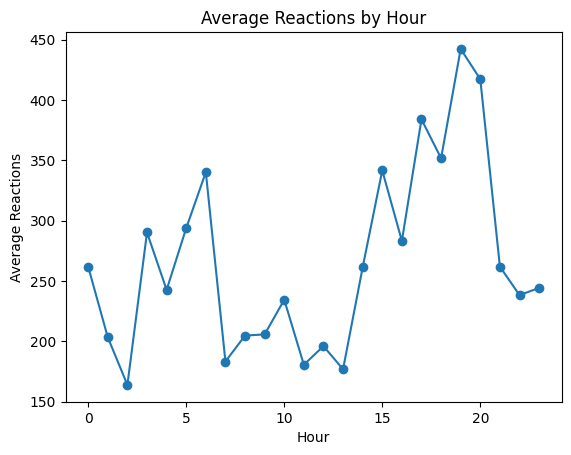

In [35]:
# Extract the hour
dataset['hour'] = dataset['status_published'].dt.hour

# Group by hour and calculate mean reactions
avg_rxns_by_hour = dataset.groupby('hour')['num_reactions'].mean()

#PLOT
plt.plot(avg_rxns_by_hour.index, avg_rxns_by_hour.values, marker='o')
plt.xlabel('Hour')
plt.ylabel('Average Reactions')
plt.title('Average Reactions by Hour')
plt.show()

*Conclusion: As per the plot, the highest number of reactions were received at 7 p.m. and the lowest number of reactions at 2 a.m.*

DAY OF UPLOAD VS REACTIONS TREND

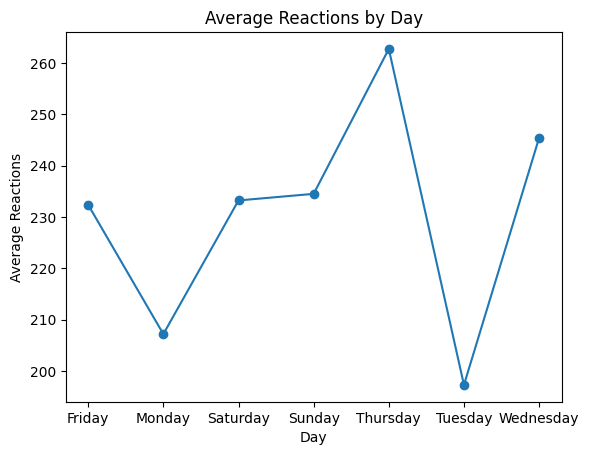

In [38]:
# Extract the day
dataset['day'] = dataset['status_published'].dt.day_name()

# Group by day and calculate mean reactions
avg_rxns_by_day = dataset.groupby('day')['num_reactions'].mean()

#PLOT
plt.plot(avg_rxns_by_day.index, avg_rxns_by_day.values, marker='o')
plt.xlabel('Day')
plt.ylabel('Average Reactions')
plt.title('Average Reactions by Day')
plt.show()

*Conclusion: As per the plot, the most number of reactions were received on Thursdays and least on Tuesdays.*

# **ANSWER 2.**

In [39]:
#Identifying the correlation between num_reactions and num_comments
correlation = dataset['num_reactions'].corr(dataset['num_comments'])
print(f"The correlation between num_reactions and num_comments is: {correlation}")

#Identifying the correlation between num_reactions and num_shares
correlation2 = dataset['num_reactions'].corr(dataset['num_shares'])
print(f"The correlation between num_reactions and num_shares is: {correlation2}")

The correlation between num_reactions and num_comments is: 0.15084290344217643
The correlation between num_reactions and num_shares is: 0.250722516628319


*Conclusion : The strength of correlation between num_reactions and num_comments is weak(0.15) and in the positive direction.
The strength of correlation between num_reactions and num_shares is also weak (0.25) and in the positive direction.*

# **ANSWER 3. AND 4.**

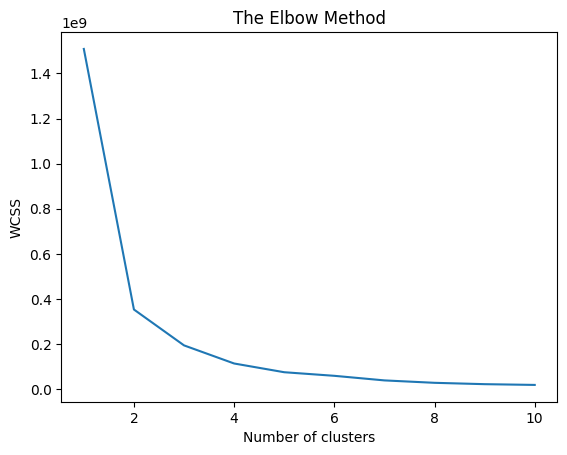

In [40]:
from sklearn.cluster import KMeans

x = dataset.iloc[:,[3,11]].values

#USING ELBOW METHOD TO FIND OPTIMUM NUMBER OF CLUSTERS
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(x)
  #compute wcss values
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

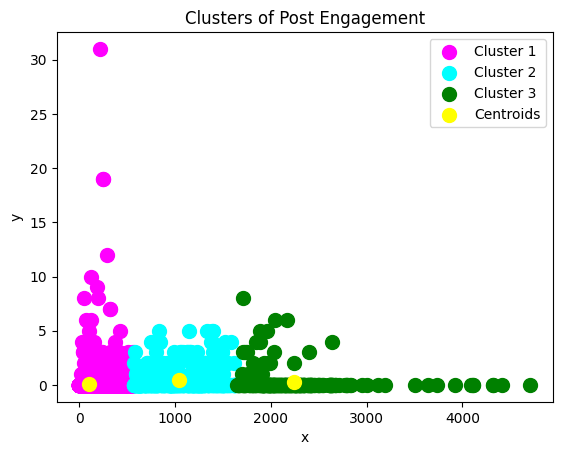

In [41]:
kmeans = KMeans(n_clusters= 3, init = 'k-means++',random_state= 42)
y_kmeans = kmeans.fit_predict(x) #predicts cluster labels

#VISUALISING THE CLUSTERS
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'magenta', label = 'Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'cyan', label = 'Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Post Engagement')
plt.xlabel('x')
plt.ylabel("y")
plt.legend()
plt.show()

# **ANSWER 5**

In [47]:
#To find out the count of types of posts in the dataset
x = dataset.groupby("status_type")
print(x.size())

status_type
link        63
photo     4288
status     365
video     2334
dtype: int64


*Conclusion: Here, we can figure out that there are 4 types of posts in the dataset: Link, Photo, Status, Video*

# **ANSWER 6**

In [49]:
#The average value of num_reaction, num_comments, num_shares for each post type

avg_rxn_per_post = dataset.groupby("status_type")["num_reactions"].mean()
avg_comments_per_post = dataset.groupby("status_type")["num_comments"].mean()
avg_shares_per_post = dataset.groupby("status_type")["num_shares"].mean()

print(f"Average num_reactions per post type: {avg_rxn_per_post}")
print(f"Average num_comments per post type: {avg_comments_per_post}")
print(f"Average num_shares per post type: {avg_shares_per_post}")

Average num_reactions per post type: status_type
link      370.142857
photo     181.290345
status    438.783562
video     283.409597
Name: num_reactions, dtype: float64
Average num_comments per post type: status_type
link        5.698413
photo      15.993470
status     36.238356
video     642.478149
Name: num_comments, dtype: float64
Average num_shares per post type: status_type
link        4.396825
photo       2.553871
status      2.558904
video     115.679949
Name: num_shares, dtype: float64
